# A simple Gaussian Process of Geospatial NetCDF data

## Importing netCDF4 package and accessing metadata:

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4 as nc
import numpy as np
import tqdm
fp='GSA_AlbedoProd_GOES_075_VIS02_2000_181.nc'
ds = nc.Dataset(fp)

In [2]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Year: 2000
    day_in_year_start: 181
    day_in_year_end: 181
    product_generation_time: 1163442342
    netcdf_generation_time: 1170611002
    product_name: Global Surface Albedo
    version:  3.0
    geo_sat_id: GO08
    calibration_version: NCDC
    wa_first_pixel: 193
    wa_last_pixel: 4594
    wa_first_row: 374
    wa_last_row: 5416
    number_of_lines: 5043
    water_refl_threshold: 0.05
    cloud_for_sure_threshold: 0.6
    dcp_smooth: 0.1
    tau_num_val: 7
    optical_tickness: [0.1 0.2 0.3 0.4 0.6 0.8 1. ]
    k_num_val: 7
    k_values: [0.4 0.5 0.6 0.7 0.8 0.9 1. ]
    theta_num_val: 7
    theta_values: [-0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.  ]
    prob_num_val: 10
    probability_values: [0.95 0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1 ]
    probability_pe: 0.95
    auto_corr_coeff: 0.9
    chi2_avg: 0.0
    num_proc_days: 1
    num_valid_pixels: 0
    perc_valid_pixels: 0.0
    

### Metadata can also be accessed as a Python dictionary, which is a better data structure

In [3]:
print(ds.__dict__)

{'Year': 2000, 'day_in_year_start': 181, 'day_in_year_end': 181, 'product_generation_time': 1163442342, 'netcdf_generation_time': 1170611002, 'product_name': 'Global Surface Albedo', 'version': ' 3.0', 'geo_sat_id': 'GO08', 'calibration_version': 'NCDC', 'wa_first_pixel': 193, 'wa_last_pixel': 4594, 'wa_first_row': 374, 'wa_last_row': 5416, 'number_of_lines': 5043, 'water_refl_threshold': 0.05, 'cloud_for_sure_threshold': 0.6, 'dcp_smooth': 0.1, 'tau_num_val': 7, 'optical_tickness': array([0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1. ], dtype=float32), 'k_num_val': 7, 'k_values': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ], dtype=float32), 'theta_num_val': 7, 'theta_values': array([-0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ], dtype=float32), 'prob_num_val': 10, 'probability_values': array([0.95, 0.9 , 0.8 , 0.7 , 0.6 , 0.5 , 0.4 , 0.3 , 0.2 , 0.1 ],
      dtype=float32), 'probability_pe': 0.95, 'auto_corr_coeff': 0.9, 'chi2_avg': 0.0, 'num_proc_days': 1, 'num_valid_pixels': 0, 'perc_valid_pixel

In [4]:
# accessing as a dictionary
ds_dict = ds.__dict__
print(ds_dict['probability_values'])

[0.95 0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1 ]


## Accessing the dimensions (coordinates) and Albedo data

In [5]:
# get the variable names
ds.variables.keys()

dict_keys(['BHRiso', 'DHR30', 'OverallQuality', 'NumSolutions', 'InputSlots', 'InputSlotsASM', 'SurfaceIndex', 'AOT', 'R_0', 'Error_R_0', 'DHR30_ Error_10_Days', 'DaysAvailable', 'BestDay', 'Chi2ASM', 'Chi2DCP', 'ProbabilityThreshold', 'DHR30_Error_BestDay', 'Error_K', 'Error_T', 'Error_Tau', 'AOTAvgValue', 'StdErrAOTAvgValue', 'Radiom_RelError', 'latitude', 'longitude'])

In [6]:
ds.variables['BHRiso'][:] # BHRiso is a masked array

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=255,
  dtype=float32)

In [7]:
ds.variables['latitude'][:] # Latitude is a masked array

masked_array(
  data=[[999., 999., 999., ..., 999., 999., 999.],
        [999., 999., 999., ..., 999., 999., 999.],
        [999., 999., 999., ..., 999., 999., 999.],
        ...,
        [999., 999., 999., ..., 999., 999., 999.],
        [999., 999., 999., ..., 999., 999., 999.],
        [999., 999., 999., ..., 999., 999., 999.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [8]:
# import masked array package
import numpy.ma
# get the 'data' variable by using .filled() & filling the mask with nan's
bhriso = ds.variables['BHRiso'][:].filled(np.nan)
lat = ds.variables['latitude'][:].filled(np.nan)
lon = ds.variables['longitude'][:].filled(np.nan)

In [9]:
# "Flatten" the arrays
bhriso = [item for sublist in bhriso for item in sublist]
lat = [item for sublist in lat for item in sublist]
lon = [item for sublist in lon for item in sublist]

In [10]:
# sanity check on the dimensions
print(len(bhriso))
print(len(lat))
print(len(lon))

22199286
22199286
22199286


In [11]:
# create a Pandas dataframe
import pandas as pd
data = pd.DataFrame({
    'lat': lat,
    'lon': lon,
    'bhriso': bhriso,
})

In [12]:
# drop na's
data = data.dropna()

In [13]:
print(data.head())

               lat        lon    bhriso
1468122 -44.505146 -65.444191  0.062992
1468126 -44.502384 -65.552704  0.133858
1468127 -44.501640 -65.579842  0.110236
1472521 -44.476540 -65.368515  0.110236
1472523 -44.475300 -65.422714  0.062992


In [14]:
print(data.head())

               lat        lon    bhriso
1468122 -44.505146 -65.444191  0.062992
1468126 -44.502384 -65.552704  0.133858
1468127 -44.501640 -65.579842  0.110236
1472521 -44.476540 -65.368515  0.110236
1472523 -44.475300 -65.422714  0.062992


## Restricting the data to a specific region

In [15]:
# define the boundaries
minlon = -90; maxlon = -60; minlat = -8; maxlat = 15

In [16]:
# subset the pandas data frame to the boundaries
regional_dat = data.loc[(data['lat'] <= maxlat) & (data['lat'] >= minlat) 
        & (data['lon'] <= maxlon) & (data['lon'] >= minlon)]

In [17]:
!pip install global-land-mask

  Using cached global_land_mask-1.0.0-py3-none-any.whl (1.8 MB)


In [18]:
# only focus on land masses
from global_land_mask import globe

In [19]:
landmass_region = regional_dat.loc[globe.is_land(regional_dat['lat'], regional_dat['lon'])]

In [20]:
print(landmass_region.head())

              lat        lon    bhriso
8775526 -7.994102 -69.991493  0.035433
8775615 -7.990644 -71.619133  0.039370
8775734 -7.988101 -73.788979  0.039370
8775735 -7.988099 -73.807190  0.043307
8775739 -7.988044 -73.880051  0.039370


## Preview the final data

In [21]:
## needed to do extra steps to install basemap
import os
os.environ['PROJ_LIB'] = r'/Users/yramsilva/opt/anaconda3/share/proj'
!pip install basemap

ERROR: Could not find a version that satisfies the requirement basemap (from versions: none)
ERROR: No matching distribution found for basemap


/Users/yramsilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


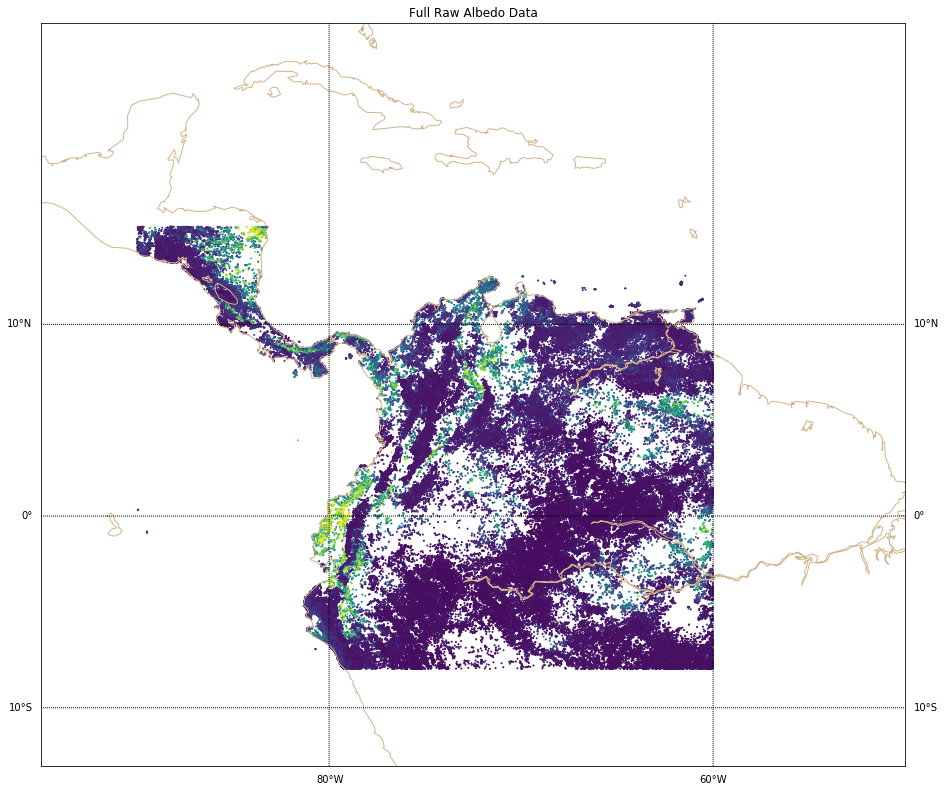

In [22]:
from mpl_toolkits.basemap import Basemap
fig=plt.figure()
fig.set_size_inches(15, 15)
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=minlon-5,llcrnrlat=minlat-5,urcrnrlon=maxlon+10,urcrnrlat=maxlat+10,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc')

m.drawcoastlines(color = 'tan')
# m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(-20,20,10),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,20),labels=[1,1,0,1])
ax.set_title('Full Raw Albedo Data')

# transform coordinates
x, y = m(landmass_region['lon'].to_numpy(), landmass_region['lat'].to_numpy())  # transform coordinates
plt.scatter(x, y,s = 1,c=landmass_region['bhriso'])


plt.show()

In [23]:
# !pip install gpytorch

In [24]:
import gpytorch
import torch
import math

In [25]:
# create a training set
full_x = torch.Tensor(landmass_region.to_numpy()[:,:2]) # the result is a (2 x n_obs) tensor
full_y = torch.Tensor(landmass_region.to_numpy()[:,2:]).squeeze() # the result is a 1 dimension tensor

In [26]:
full_y

tensor([0.0354, 0.0394, 0.0394,  ..., 0.8150, 1.0000, 0.8740])

In [27]:
# create training/test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(full_x,full_y,test_size=0.2, random_state = 1)

# move to GPU if available
if torch.cuda.is_available():
    train_x, train_y, test_x, test_y = X_train.cuda(), y_train.cuda(), X_test.cuda(), y_test.cuda()
else:
    train_x, train_y, test_x, test_y = X_train, y_train, X_test, y_test

In [28]:
# print the first few observations (i.e. head())
print(train_x[:10,:])
print(train_y[:10])
print(test_x[:10,:])
print(test_y[:10])

tensor([[  9.6549, -63.2180],
        [ -6.8643, -62.5643],
        [ -4.3835, -74.7923],
        [ -6.2485, -79.2573],
        [  4.1554, -60.7080],
        [  9.1743, -62.8212],
        [ -4.8936, -75.1537],
        [ -7.6163, -63.2559],
        [ -4.5510, -70.0665],
        [  8.6135, -63.4663]])
tensor([0.0787, 0.0630, 0.0354, 0.0748, 0.0906, 0.1142, 0.0394, 0.0394, 0.0591,
        0.1024])
tensor([[ -6.4645, -74.5556],
        [ -7.0777, -68.8142],
        [  1.2435, -68.0126],
        [  4.9183, -68.6056],
        [ -7.1876, -60.8657],
        [  3.2014, -75.2615],
        [ -5.3862, -74.1042],
        [ 10.5510, -63.1029],
        [ -3.8195, -74.6841],
        [ -1.5586, -61.6902]])
tensor([0.0472, 0.0630, 0.0630, 0.0787, 0.0433, 0.0827, 0.0787, 0.0669, 0.0394,
        0.2835])


In [29]:
# Create DataLoader to run minibatches
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

test_dataset = TensorDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [30]:
# this is the same as before but now 'automated'
class StandardApproximateGP(gpytorch.models.ApproximateGP):
    def __init__(self, train_x, train_y, n_inducing_points):
        # create a equally spaced set of inducing points
        
        
        # We select random inducing points across the space of the observations
        inducing_indexes = np.sort(np.random.choice(train_x.shape[0], size = n_inducing_points, replace=False))
        inducing_points = train_x[inducing_indexes, :]
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(-2))
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=False
        )
        super().__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [31]:
# this is for running the notebook in our testing framework
num_epochs = 4


# Our testing script takes in a GPyTorch MLL (objective function) class
# and then trains/tests an approximate GP with it on the supplied dataset

def train_and_test_approximate_gp(model_cls):
    # inducing_points = torch.randn(inducing_length, train_x.size(-1), dtype=train_x.dtype, device=train_x.device)
    # inducing_length = (int(np.rint(train_x.shape[0]*0.5)))
    # inducing_indexes = np.sort(np.random.choice(train_x.shape[0], size = inducing_length, replace=False))
    # inducing_points = train_x[inducing_indexes, :]
#     inducing_length = (int(np.rint(train_x.shape[0]*0.75)))
    model = model_cls(train_x, train_y, n_inducing_points=300)
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.numel())
#     mll = gpytorch.mlls.PredictiveLogLikelihood(likelihood, model, num_data=train_y.numel())

    optimizer = torch.optim.Adam(list(model.parameters()) + list(likelihood.parameters()), lr=0.1)

    if torch.cuda.is_available():
        model = model.cuda()
        likelihood = likelihood.cuda()

    # Training
    model.train()
    likelihood.train()
    epochs_iter = tqdm.notebook.tqdm(range(num_epochs), desc=f"Training {model_cls.__name__}")
    for i in epochs_iter:
        # Within each iteration, we will go over each minibatch of data
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(x_batch)
            loss = -mll(output, y_batch)
            epochs_iter.set_postfix(loss=loss.item())
            loss.backward()
            optimizer.step()

    # Testing
    model.eval()
    likelihood.eval()
    means = torch.tensor([0.])
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            preds = model(x_batch)
            means = torch.cat([means, preds.mean.cpu()])
    means = means[1:]
    error = torch.mean(torch.abs(means - test_y.cpu()))
    print(f"Test {model_cls.__name__} MAE: {error.item()}")
    return means

In [32]:
# WARNING: UTILIZE GPU FOR INCREASED SPEED
means = train_and_test_approximate_gp(StandardApproximateGP)


Test StandardApproximateGP MAE: 0.0533733069896698


In [33]:
means

tensor([0.0261, 0.0968, 0.0183,  ..., 0.0845, 0.0085, 0.0945])

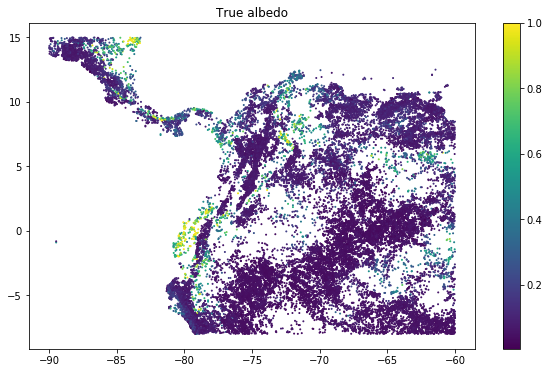

In [37]:
fig, ax = plt.subplots(figsize=(10, 6), ncols=1)
plt.scatter(test_x[:,1].cpu(), test_x[:,0].cpu(), s = 1,c=test_y.cpu())
ax.set_title('True albedo')
plt.colorbar()
plt.show()

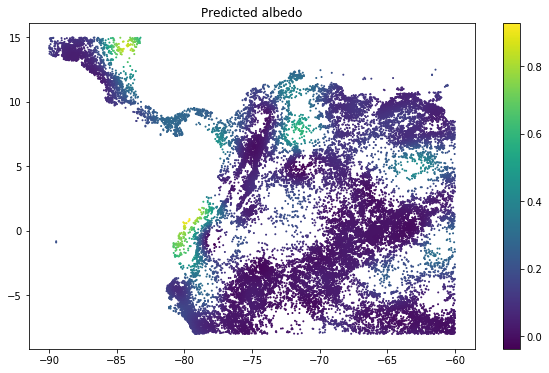

In [38]:
fig, ax = plt.subplots(figsize=(10, 6), ncols=1)
plt.scatter(test_x[:,1].cpu(), test_x[:,0].cpu(), s = 1,c=means.cpu())
ax.set_title('Predicted albedo')
plt.colorbar()
plt.show()

In [ ]:
error = np.abs(means.cpu() - test_y.cpu())

fig, ax = plt.subplots(figsize=(10, 6), ncols=1)

plt.scatter(test_x[:,1].cpu(), test_x[:,0].cpu(), s = 1,c=error)
ax.set_title('absolute difference')
plt.colorbar()
plt.show()